# Exploratory Analysis - "The Office" dataset
This notebook aims to give an overview over the subsequent NLP driven analyis of all spoken lines in the US-American TV-show "The Office".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PATH = "../data/"
FILE = "the-office-lines_scripts.csv"

In [2]:
df = pd.read_csv(PATH+FILE, sep=",", index_col="id")

In [3]:
# extract text from line_text in square brackets, put it in new column called "directionals", multiple square brackets will be extracted as a list
df["directionals"] = df["line_text"].str.extractall(r"\[(.*?)\]").unstack().apply(lambda x: ", ".join(x.dropna()), axis=1)
# delete the extracted text from line_text
df["line_text"] = df["line_text"].str.replace(r"\[(.*?)\]", "", regex=True).str.strip()

In [4]:
df

,season,episode,scene,line_text,speaker,deleted,directionals
id,,,,,,,
1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False,NaN
2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False,NaN
3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False,NaN
4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False,NaN
5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False,NaN
...,...,...,...,...,...,...,...
59905,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,False,"chuckles, standing with two cops"
59906,9,23,113,I just feel lucky that I got a chance to share...,Meredith,False,NaN
59907,9,23,114,I m happy that this was all filmed so I can ...,Phyllis,False,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59911 entries, 1 to 59909
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        59911 non-null  int64 
 1   episode       59911 non-null  int64 
 2   scene         59911 non-null  int64 
 3   line_text     59911 non-null  object
 4   speaker       59911 non-null  object
 5   deleted       59911 non-null  bool  
 6   directionals  10056 non-null  object
dtypes: bool(1), int64(3), object(3)
memory usage: 3.3+ MB


### DataFrame Analysis
- 59911 rows (=lines spoken in the show)
    - no missing values
    - correct dtypes
- 7 columns
    - The first three columns indicate the season, episode and scene number of the line. 
    - "line_text" contains the respective line in plain text
    - "speaker" shows the name of the person who said the corresponding line
    - "deleted" indicates whether or not the corresponding line made it into the final version of the show
    - "directionals" contains additional information about what the characters are doing while speaking (extracted from line_text to seperate the information types)


In [6]:
df.describe(include="all")

,season,episode,scene,line_text,speaker,deleted,directionals
count,59911.000000,59911.000000,59911.000000,59911,59911,59911,10056
unique,NaN,NaN,NaN,50668,794,2,7547
top,NaN,NaN,NaN,Yeah.,Michael,False,laughs
freq,NaN,NaN,NaN,523,12137,57975,266
mean,5.348283,11.558295,27.143613,NaN,NaN,NaN,NaN
std,2.389458,6.986292,17.860703,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,3.000000,5.000000,14.000000,NaN,NaN,NaN,NaN
50%,5.000000,11.000000,25.000000,NaN,NaN,NaN,NaN
75%,7.000000,18.000000,37.000000,NaN,NaN,NaN,NaN


### Value Analysis
- 9 seasons with a maximum of 26 episodes with at most 116 scenes
- 50668 of the 59911 spoken lines are unique
- "Yeah." is the most frequently spoken line with a total of 486 occurrences
- there are 794 different people speaking throughout the show
- Michael is the character with the most lines with total number of 12137 lines
- 57975 of the available 59911 lines actually made it into the final version of the show

### Data Quality
A few lines were  missing (line break not working). Those were looked at and manually corrected in the dataset before loading.
### Limitations
- missing lines in scenes
- few directorials, don’t describe everything that happens on screen (context is lost in some cases  (semantic gap))
- intermedial references are displayed in a unclear manor
- tmore features describing the scene would improve analytical options (e.g. spatial dimension, …)
- some episodes are missing
    - hypothesis: double episodes are only listed as one in the dataset (confirmed by checking the number of double episodes per season https://en.wikipedia.org/wiki/List_of_The_Office_(American_TV_series)_episodes and watching the respective episodes and checking the lines in the dataset)

## Data Distribution

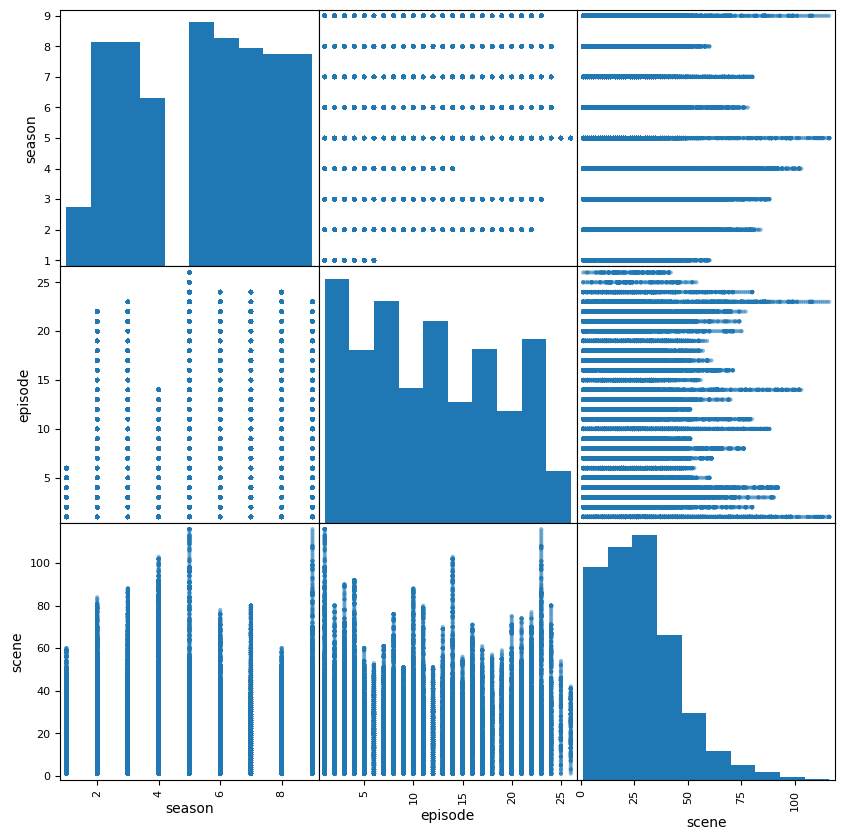

In [7]:
# scatter matrix of all numeric columns
pd.plotting.scatter_matrix(df[['season', 'episode', 'scene']], figsize=(10,10))
plt.show()

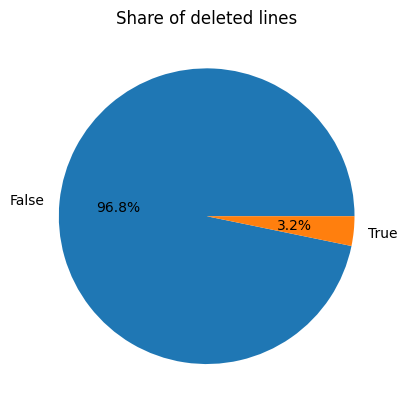

In [8]:
# show a pie chart of the share of deleted lines
df["deleted"].value_counts().plot.pie(autopct="%.1f%%")

plt.ylabel("")
plt.title("Share of deleted lines")
plt.show()

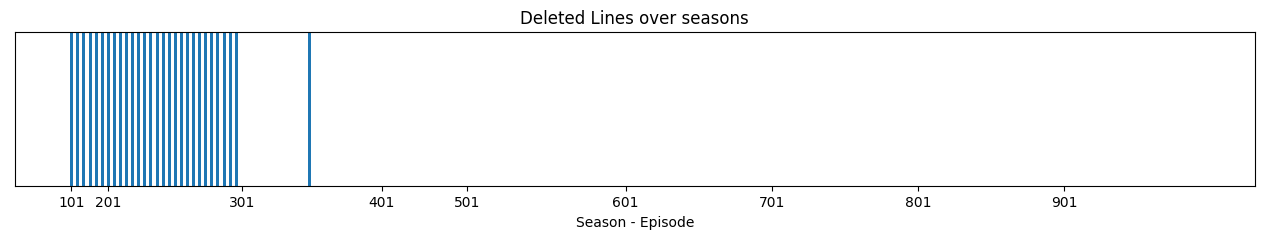

In [9]:
# show the deleted lines over the seasons
df["season_episode"] = df.apply(lambda x: f"{x['season']}{'0' if x['episode']<10 else ''}{x['episode']}", axis=1)

plt.figure(figsize=(16,2))
plt.scatter(df["season_episode"], df["deleted"].sort_index(), alpha=0.5, s=10, c="white")
plt.vlines(df["season_episode"].loc[df["deleted"]==True], ymin=0, ymax=1, linewidths=1)
plt.xticks(["101", "201", "301", "401", "501", "601", "701", "801", "901"])
plt.yticks([])
plt.ylim(0,1)
plt.xlabel("Season - Episode")
plt.title("Deleted Lines over seasons")
plt.show()

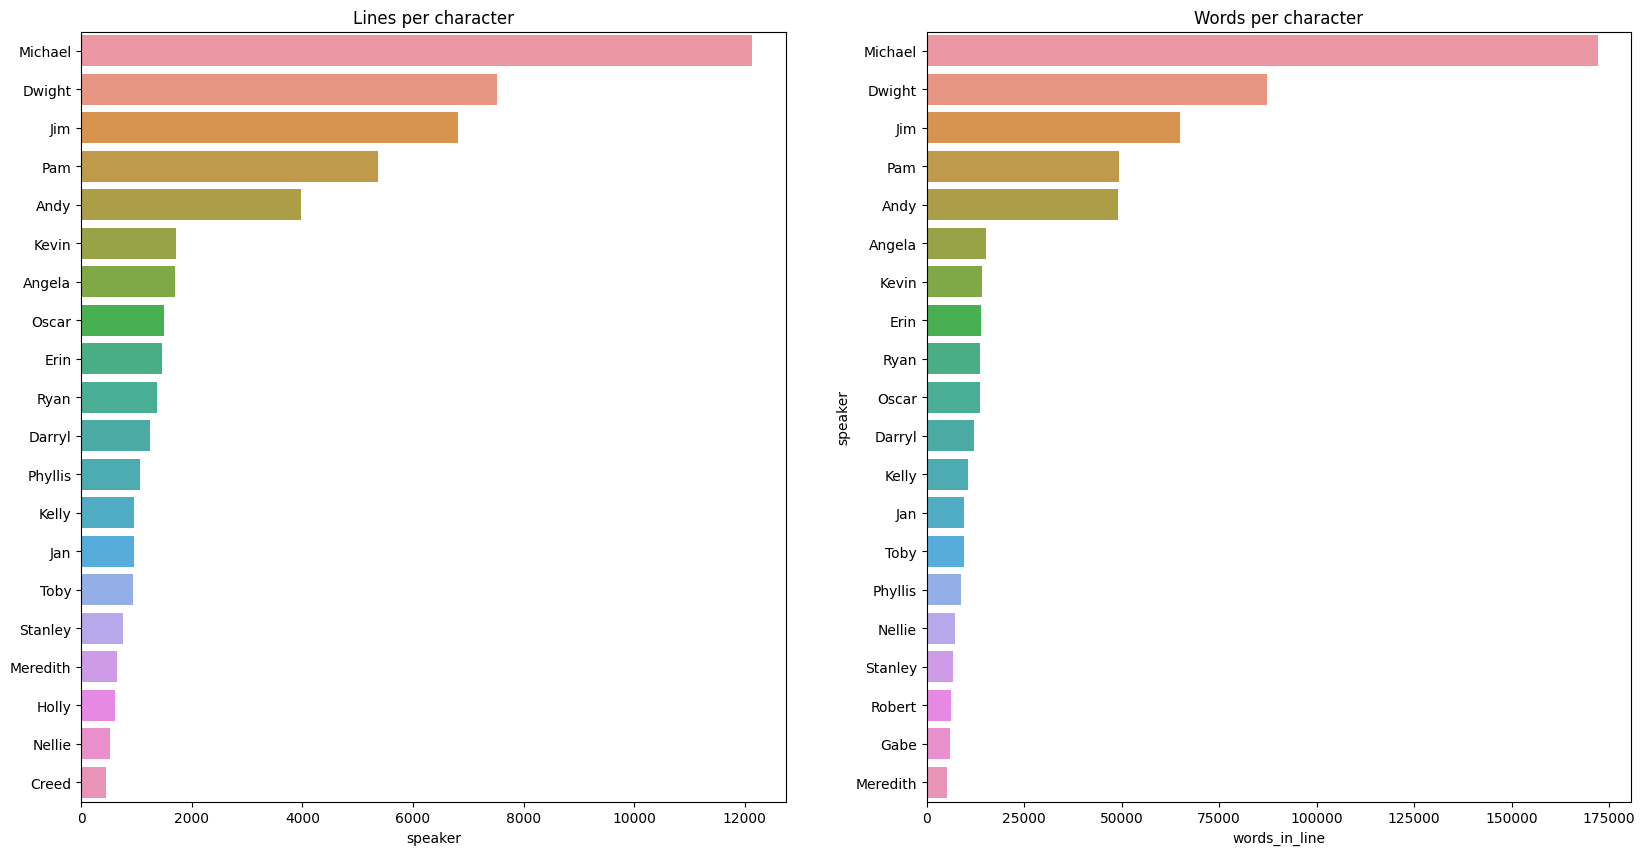

In [10]:
# display plots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# lines and words per character
lines_per_character = df["speaker"].value_counts()[:20]
plot = sns.barplot(y=lines_per_character.index, x=lines_per_character,ax=ax1)

df["words_in_line"] = df["line_text"].apply(lambda x: len(x.split(" ")))
words_per_character = df.groupby("speaker").sum(numeric_only=True)["words_in_line"].sort_values(ascending=False)[:20]
plot2 = sns.barplot(y=words_per_character.index, x=words_per_character,ax=ax2)

plot.set_title("Lines per character")
plot2.set_title("Words per character")

plt.show(fig)
